### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [31]:
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages 
import matplotlib.pyplot as plt

In [17]:
data={}
data["Normal Distribution_1"]=(np.random.normal(size=20))  
data["Normal Distribution_2"]=(np.random.normal(size=20))  
data["Normal Distribution_3"]=(np.random.normal(size=20))  
data["Uniform Distribution1"]=(np.random.uniform(low=1,high=2,size=20))
data[" Beta distribution."]=(np.random.beta(1,2,size=20))
data["Uniform Distribution2"]=(np.random.uniform(size=20))


print(data)


{'Normal Distribution_1': array([-1.20485232,  0.27566639,  1.05176992,  0.0567444 , -0.68817416,
        0.29784024,  1.03823781,  1.17372132, -1.11310898,  2.45022324,
       -1.29021677,  0.01460421, -1.46624238,  1.17683229,  2.1157289 ,
       -2.6751997 ,  1.02536377,  1.57636914,  0.31268799,  1.47096704]), 'Normal Distribution_2': array([ 0.3691439 , -0.15855999,  0.81451238,  0.92127032,  0.23558016,
        1.10309404,  1.12114102,  0.51936593,  1.09920378,  0.32091581,
       -0.66619161, -0.53874962, -0.4027792 , -0.43042342, -1.48173241,
        0.87863043,  0.6554988 , -1.2867705 , -0.4095143 , -0.53396137]), 'Normal Distribution_3': array([ 0.11915001, -0.35528411,  0.49556524, -0.51712802,  1.44195652,
        1.54812188,  0.06018404, -1.04472934, -0.10991391,  1.38701506,
       -0.13774525,  0.71527814, -1.65481359,  1.34519397, -0.43467787,
       -0.07522732, -0.58489987, -0.07998646,  1.14351426,  0.57738311]), 'Uniform Distribution1': array([1.63178303, 1.1663346 

2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [24]:
def dem_Sh_Uil(data, num_of_var ,num_of_observations=20):  
    for val in data.values():    
       val.sort()  
    s=[]
    for val in data.values(): 
        s.append(sum([ (i - np.mean(val)) **2 for i in val]))
    print(s)
    ex1=pd.read_excel('Coeficients for the W test for normality.xlsx')[num_of_observations-1]/10000   
    b=[]
    for value in data.values(): 
        first_half=value[:len(value)//2]
        second_half=np.flip(value[len(value)//2:])
        to_append = np.multiply(ex1[:10], (second_half-first_half))
        b.append(to_append) 
    arr_with_s=[]
    for i in range(len(b)):
         arr_with_s.append(((i)**2)/s[i])
    for i in range(len(arr_with_s)):
        if arr_with_s[i]>0.905:
            print('not norm')
        else:
            print('norm')
        

     
dem_Sh_Uil(data,6,20)

[33.96064354945808, 12.144404748525607, 14.686100975091067, 1.603229448849273, 1.205809156843205, 1.8506766862936634]
norm
norm
norm
not norm
not norm
not norm


3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [19]:
table=pd.DataFrame(columns=["Variable","Statistics","Distribution"]) 
table

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [20]:
table['Variable']=data.keys()
table

,Variable,Statistics,Distribution
0,Normal Distribution_1,NaN,NaN
1,Normal Distribution_2,NaN,NaN
2,Normal Distribution_3,NaN,NaN
3,Uniform Distribution1,NaN,NaN
4,Beta distribution.,NaN,NaN
5,Uniform Distribution2,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [21]:
table["Distribution"]=['normal' if 'Normal Distribution' in x else 'non-normal'
                          for x in table["Variable"]]
table
                     

,Variable,Statistics,Distribution
0,Normal Distribution_1,NaN,normal
1,Normal Distribution_2,NaN,normal
2,Normal Distribution_3,NaN,normal
3,Uniform Distribution1,NaN,non-normal
4,Beta distribution.,NaN,non-normal
5,Uniform Distribution2,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [22]:
n_df=pd.DataFrame((data), columns=data.keys()) 



for _,val in table.iterrows():
    name = val["Variable"]    
    if val["Distribution"] != "non-normal": 
        val["Statistics"]="{:.3f} [{:.3f}]".format(n_df[name].mean(),n_df[name].std()) 
    else:
        val["Statistics"]="{:.3f} [{:.3f}; {:.3f}]".format(n_df[name].median(),n_df[name].quantile(0.25),n_df[name].quantile(0.75)) 
        
table

,Variable,Statistics,Distribution
0,Normal Distribution_1,0.280 [1.337],normal
1,Normal Distribution_2,0.106 [0.799],normal
2,Normal Distribution_3,0.192 [0.879],normal
3,Uniform Distribution1,1.337 [1.256; 1.739],non-normal
4,Beta distribution.,0.398 [0.293; 0.535],non-normal
5,Uniform Distribution2,0.513 [0.161; 0.716],non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

8. Зберегти таблицю в пдф форматі

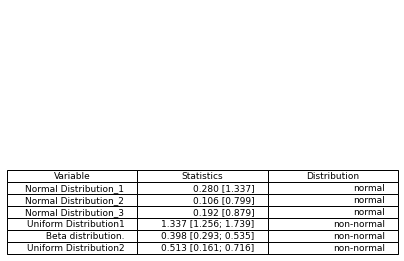

In [35]:
f,ax=plt.subplots(figsize=(7,3))
ax.axis('off')
table_to_save=ax.table(cellText=table.values, colLabels=table.columns)

to_save=PdfPages("table.pdf") 
to_save.savefig(f) 
to_save.close() 

